# Teknoloji Hisse Senetlerini Analiz Etme ve Tahmin Yapma
Bu projede, önde gelen 'FAANG' şirketlerinin (Facebook, Apple, Amazon, Netflix ve Google) değer, risk ve getiri ölçümleri de dahil olmak üzere verilerini analiz etmek için pandaları kullanacağım. Bu not defterinde ele alacağım sorulardan bazıları şunlardır:


Hisse senedi fiyatımızda zaman içinde ne gibi değişiklikler oldu?
Hisse senetlerimizin hareketli ortalaması neydi?
Bir hisse senedinin günlük getiri ortalaması ne kadardı?
Farklı hisse senetlerinin günlük getirileri arasındaki korelasyon neydi?
Belirli bir hisse senedine yatırım yaparak ne kadar değeri riske atıyoruz?
Gelecekteki 'FAANG' hisse senedi davranışını nasıl tahmin etmeye çalışabiliriz?

In [10]:
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# Görselleştirme içe aktarmaları
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
# Yahoo Geçmiş Hisse Senetlerine erişmek için yfinance'ı kullanma
import yfinance as yf

Beş "FAANG" şirketini, ortalama hisse senedi fiyatlarını ve getirilerini analiz etmek ve sonuçta son 365 gündeki hisse senetlerinin risk değerlendirmesini yapmak için karşılaştıracağım.

In [11]:
stock_list = ['AAPL','GOOG','MSFT','AMZN','NFLX']

end = datetime.now()

# Başlangıç ​​tarihi 1 yıl geriye ayarlandı
start = datetime(end.year-1,end.month,end.day) 

for stock in stock_list:
    globals()[stock] = yf.download(stock,start,end) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Netflix'in geçen yılki hisse senedi fiyatına ilişkin basit istatistikleri burada listeledim.

In [12]:
NFLX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,379.443306,384.878248,374.314941,379.588645,379.588645,6.690012e+06
std,54.070869,54.099817,54.055763,54.075517,54.075517,4.029981e+06
min,281.239990,285.190002,273.410004,276.880005,276.880005,1.404700e+06
25%,330.435013,333.990005,325.070007,330.580002,330.580002,4.251400e+06
50%,377.109985,382.579987,372.250000,376.899994,376.899994,5.660700e+06
75%,429.495010,436.759995,425.830002,429.300003,429.300003,7.493350e+06
max,479.029999,485.000000,476.559998,479.559998,479.559998,2.843030e+07


In [13]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-12-09 to 2023-12-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


## Hisse Senedi Fiyatında Zaman İçinde Değişim

<Axes: xlabel='Date'>

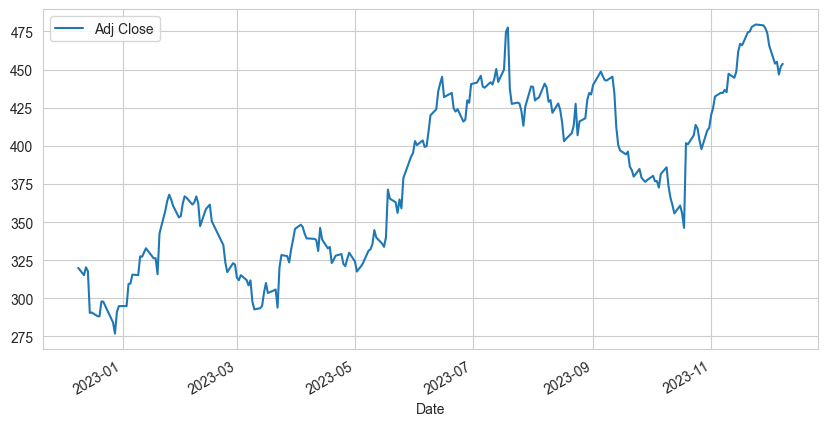

In [14]:
NFLX['Adj Close'].plot(legend = True, figsize = (10,5))

<Axes: xlabel='Date'>

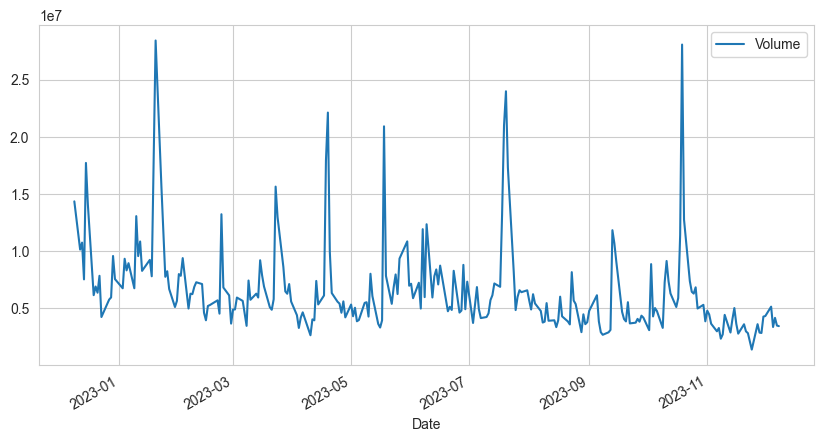

In [15]:
NFLX['Volume'].plot(legend = True, figsize = (10,5))

Güçlü bir ilk çeyreğin ardından Netflix hisse senedi fiyatları 375 dolar civarında dalgalanırken hacmi günlük 600.000 hisse civarına düştü. Şimdi verilerimizdeki değişiklikleri düzeltmek ve daha iyi bir trend elde etmek için birkaç farklı hareketli ortalamayı hesaplayalım.

## Hareketli Ortalamaların Hesaplanması

In [16]:
averages = [10,25,50]
for avg in averages:
    label = "MAvg for %s days" %(str(avg))
    NFLX[label] = NFLX['Adj Close'].rolling(window = avg, center = False).mean()

In [17]:
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Date,,,,,,,,,
2023-12-04,460.989990,461.200012,451.200012,453.899994,453.899994,5157700,473.595001,452.457598,416.717798
2023-12-05,450.700012,456.390015,449.579987,455.149994,455.149994,3380700,471.663000,454.260398,418.124799
2023-12-06,460.000000,460.500000,445.730011,446.730011,446.730011,4178800,468.841000,455.661998,419.474399
2023-12-07,450.850006,452.890015,448.320007,452.000000,452.000000,3506700,466.241000,456.934398,420.962599
2023-12-08,450.760010,455.500000,450.760010,453.760010,453.760010,3456100,463.661002,458.096399,422.510599


<Axes: xlabel='Date'>

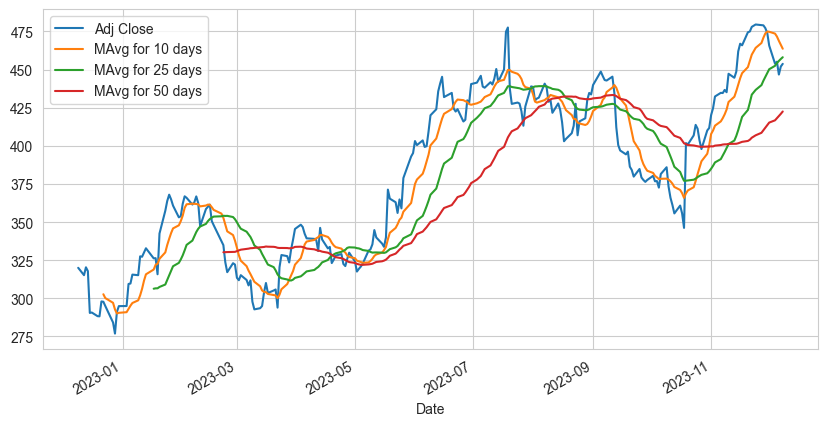

In [18]:
NFLX[['Adj Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))

50 günlük hareketli ortalama, Netflix'in hisselerinin son üç aydır 365 dolarda sabit kaldığı yönündeki gözlemimizi destekliyor. Bu grafik aynı zamanda Netflix'in hisse senedi trendinin ne zaman arttığını veya azaldığını bize söyleyen yaklaşık geçiş noktalarını da ortaya koyuyor. Şimdi Netflix hisselerinin ortalama günlük getirilerini hesaplayalım.

## Günlük Getiri Ortalamaları.

In [19]:
# Ayarlanan kapanış fiyatı üzerinden yüzdesel değişim kullanılarak günlük getiri sütunu oluşturulabilir.
NFLX['Daily Return'] = NFLX['Adj Close'].pct_change()
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,Daily Return
Date,,,,,,,,,,
2023-12-04,460.989990,461.200012,451.200012,453.899994,453.899994,5157700,473.595001,452.457598,416.717798,-0.025422
2023-12-05,450.700012,456.390015,449.579987,455.149994,455.149994,3380700,471.663000,454.260398,418.124799,0.002754
2023-12-06,460.000000,460.500000,445.730011,446.730011,446.730011,4178800,468.841000,455.661998,419.474399,-0.018499
2023-12-07,450.850006,452.890015,448.320007,452.000000,452.000000,3506700,466.241000,456.934398,420.962599,0.011797
2023-12-08,450.760010,455.500000,450.760010,453.760010,453.760010,3456100,463.661002,458.096399,422.510599,0.003894


<Axes: xlabel='Date'>

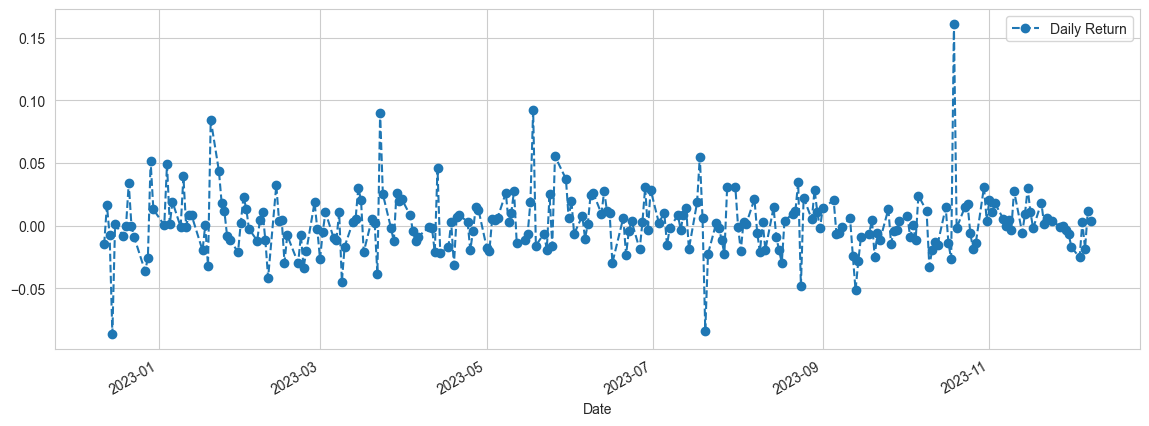

In [20]:
NFLX['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

<Axes: xlabel='Daily Return', ylabel='Density'>

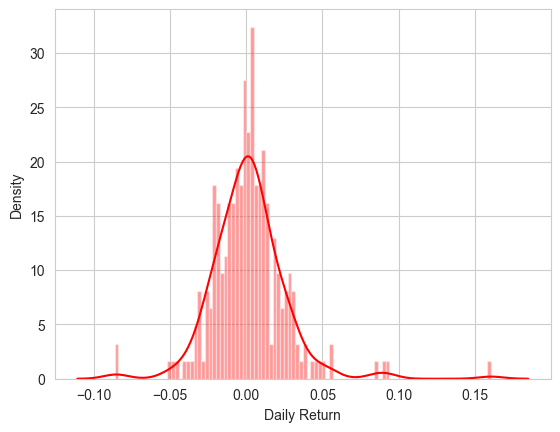

In [21]:
sns.distplot(NFLX['Daily Return'].dropna(),bins=100,color='red')

Eksenlerimizi çizmek için Seaborn'u kullandığımızda, günlük getiri dağılımının ağırlıklı olarak 0 civarında yoğunlaştığını ve pozitif ya da negatif getirilere doğru çok az sapma olduğunu görüyoruz.

## Farklı Günlük Hisse Senedi Getirileri Arasındaki Korelasyon

Şimdi Seaborn'un ortak grafiği özelliğini kullanarak günlük getirilerdeki yüzde değişimi kullanarak bazı 'FAANG' hisse senedi çiftleri arasındaki eğilimi inceleyelim.

In [22]:
close_compr = yf.download(stock_list,start,end)['Adj Close']
rets_compr = close_compr.pct_change()
rets_compr.tail()

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2023-12-04,-0.009465,-0.014895,-0.020177,-0.014339,-0.025422
2023-12-05,0.021063,0.014085,0.013473,0.009156,0.002754
2023-12-06,-0.005687,-0.016068,-0.007251,-0.009986,-0.018499
2023-12-07,0.010139,0.016330,0.053412,0.005830,0.011797
2023-12-08,0.007412,0.003676,-0.013073,0.008842,0.003894


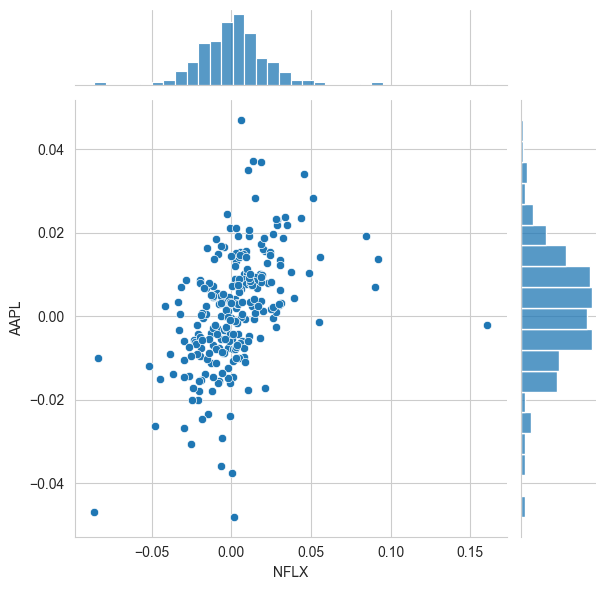

In [23]:
sns.jointplot(x='NFLX', y='AAPL', data=rets_compr, kind='scatter')


Netflix ve Apple getirileri arasında orta düzeyde bir korelasyon var gibi görünüyor. Daha güçlü bir korelasyon olup olmadığını görmek için tüm ikili grafikleri oluşturacağım.

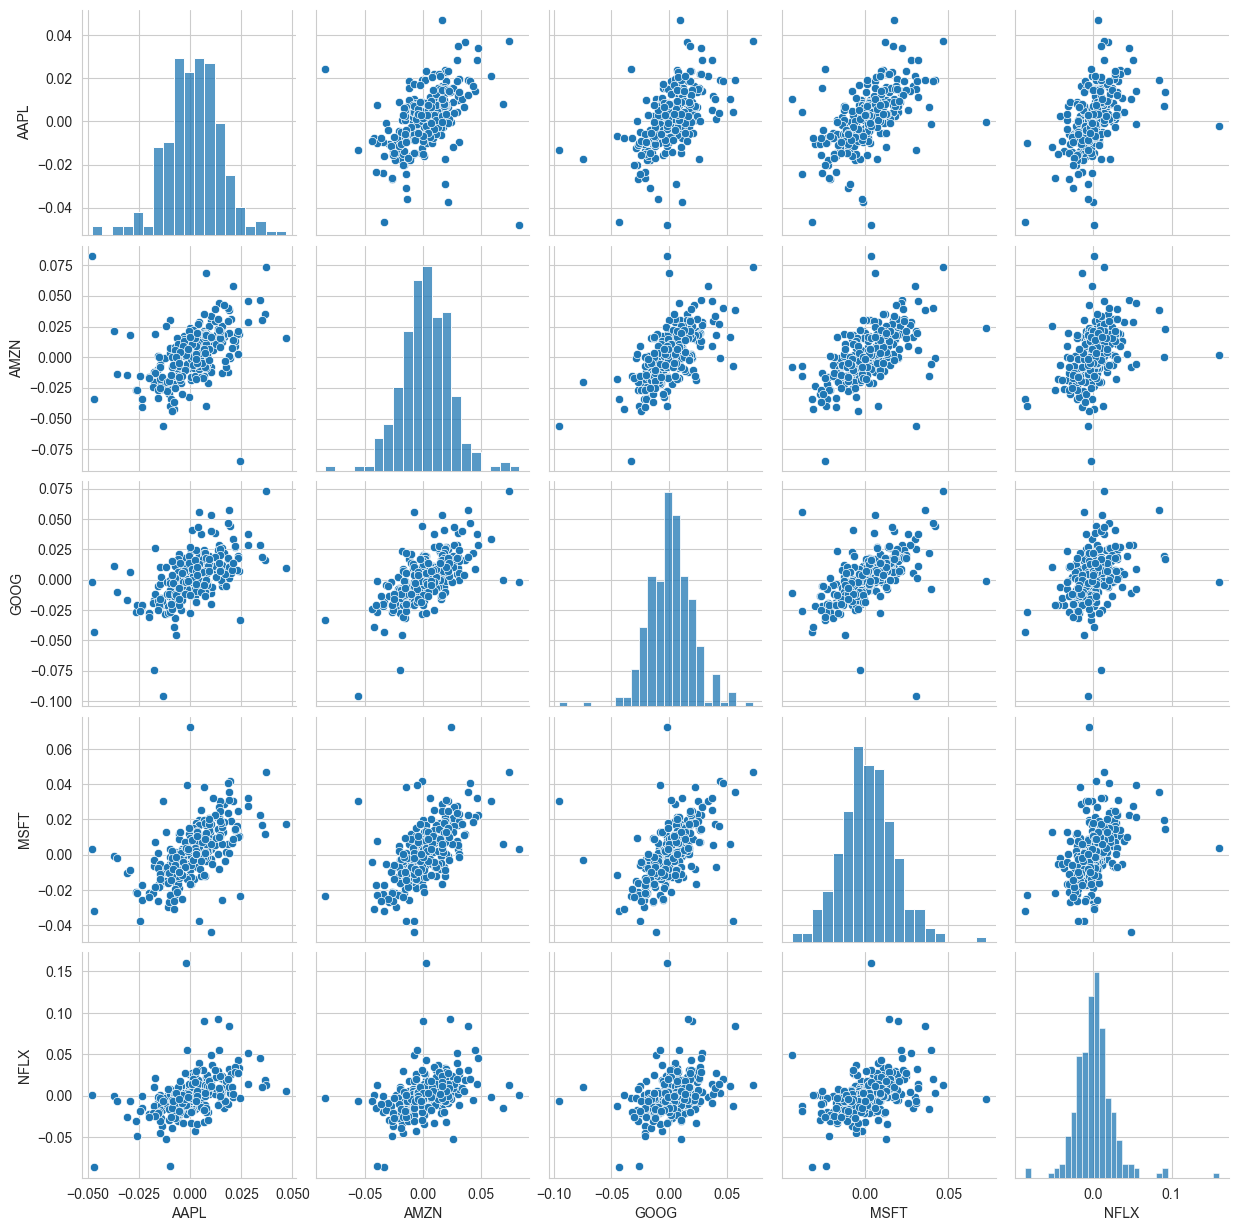

In [24]:
sns.pairplot(rets_compr.dropna())

Başka bir görselleştirme aracına ihtiyacımız olduğundan emin olmak için Amazon ve Microsoft arasında daha güçlü korelasyonlar var gibi görünüyor. İkili güven aralıklarını birlikte görüntülememize olanak tanıyan korelasyon matrisi grafiği, bunu yapmak için harika bir seçenektir.

          AAPL      AMZN      GOOG      MSFT      NFLX
AAPL  1.000000  0.463443  0.557458  0.576253  0.464549
AMZN  0.463443  1.000000  0.633124  0.593983  0.391526
GOOG  0.557458  0.633124  1.000000  0.541785  0.365447
MSFT  0.576253  0.593983  0.541785  1.000000  0.409006
NFLX  0.464549  0.391526  0.365447  0.409006  1.000000


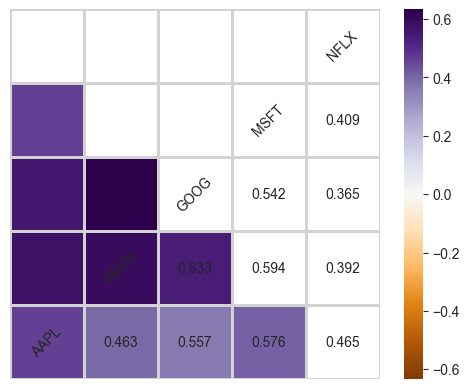

In [25]:
corr = rets_compr.corr()
print(corr)
# Üst üçgen için bir maske oluşturun
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Matplotlib figürünü ayarlayın
fig, ax = plt.subplots()

# Isı haritasını maskeyle ve doğru en boy oranıyla çizin
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

Korelasyon ısı haritasından Microsoft ve Amazon'un daha güçlü bir korelasyonu paylaştığı açıkça görülüyor ve genel olarak
Microsoft, 'FAANG' şirketlerinin geri kalanıyla karşılaştırıldığında en güçlü ikili toplam korelasyonu sürdürüyor. Beklenebilir olsa da, beş şirketin tamamının ikili olarak orta ila güçlü pozitif korelasyona sahip olması dikkat çekicidir.

## Riskten ve Beklenen Getiriden Değerin Belirlenmesi
Şimdi bu beş şirketi karşılaştırmak için hisse senedi satın almanın riski sorusunu ele alıyoruz.

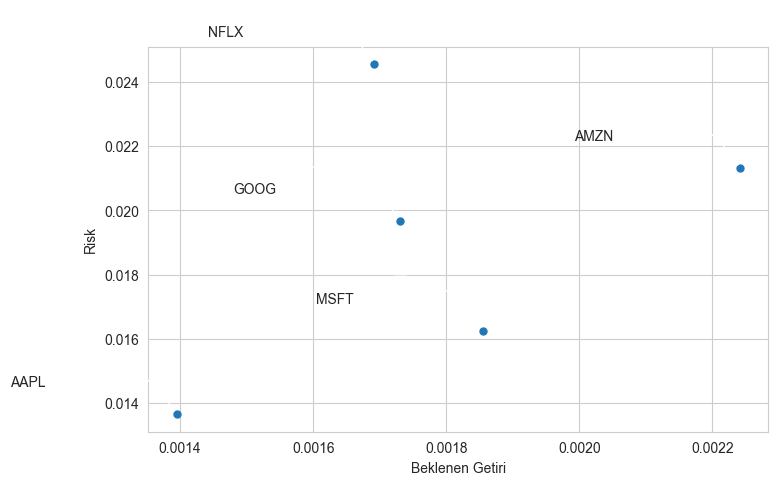

In [26]:
rets_filled = rets_compr.dropna()
plt.figure(figsize=(8,5))

plt.scatter(rets_filled.mean(),rets_filled.std(),s=25)

plt.xlabel('Beklenen Getiri')
plt.ylabel('Risk')

for label,x,y in zip(rets_filled.columns,rets_filled.mean(),rets_filled.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

Bu grafikten Microsoft'un en yüksek beklenen getiriye ve en düşük riske sahip olduğunu görebiliyoruz; bu da Microsoft'un şu anda satın alınabilecek en iyi hisse senedi olduğuna dair bir işaret. Bulut bilişim sektörlerindeki revizyonu ve yüksek profilli satın almalarıyla Microsoft hisseleri burada açık ara kazanan konumunda. Netflix'in performansı, en yüksek riskin yanı sıra neredeyse sıfır olumlu beklenen getiriye sahip olduğundan daha endişe verici.

Bu 5 şirket için her risk güven aralığındaki değeri değerlendirmek amacıyla ek bir riske maruz değer metriği modellemek istiyoruz. Bunu iki şekilde deneyelim: önyükleme yapmak ve Monte Carlo-GBM'yi Google ile kullanmak.

In [27]:
rets_compr.head()

,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2022-12-09,NaN,NaN,NaN,NaN,NaN
2022-12-12,0.016390,0.016388,0.005265,0.028889,-0.015093
2022-12-13,0.006783,0.021425,0.024476,0.017465,0.016372
2022-12-14,-0.015536,-0.009839,-0.005634,0.001168,-0.007835
2022-12-15,-0.046854,-0.034178,-0.043122,-0.031918,-0.086272


In [28]:
rets_compr['GOOG'].quantile(q=0.05)


-0.026680513830074675

In [29]:
rets_compr['GOOG'].quantile(q=0.01)

-0.04428400520070953

Her iki güven aralığı için verilen ampirik dilimlerden, olabilecek en kötü kaybın %95 güvenle yüzde 2,65'i, %99 güvenle yüzde 5,04'ü aşmayacağını biliyoruz.

## Gelecekteki Riski ve Hisse Senetlerinin Değerini Tahmin Etmek
Hisse senetlerimizin istikrarını değerlendirmek ve gelecekteki riskleri tahmin etmek için GBM modeli üzerinde Monte Carlo Yöntemini kullanıyoruz. Bu bileşen için Google'ın hisselerini analiz edeceğim.

In [30]:
days = 365

#delta t
dt = 1/365

mu = rets_compr.mean()['GOOG']

sigma = rets_compr.std()['GOOG']


def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

Google hisse senetlerinin 100 Monte Carlo simülasyonunu gerçekleştireceğiz. İşte yine hisse senedinin açılış değerleri.

In [31]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-09,93.900002,94.489998,93.019997,93.070000,93.070000,21885300
2022-12-12,93.089996,93.875000,91.900002,93.559998,93.559998,27380900
2022-12-13,98.070000,99.800003,95.379997,95.849998,95.849998,34788500
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800


Text(0.5, 1.0, 'Google için Monte Carlo Analizi')

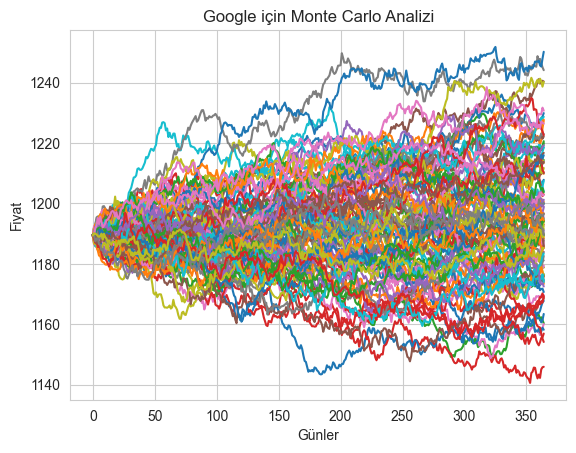

In [32]:
start_price = 1189.39 #Taken from above

for run in range(1,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Günler')
plt.ylabel('Fiyat')
plt.title('Google için Monte Carlo Analizi')

Text(0.5, 1.0, 'Google Hisse Senedi için son fiyat dağılımı 365 gün sonra')

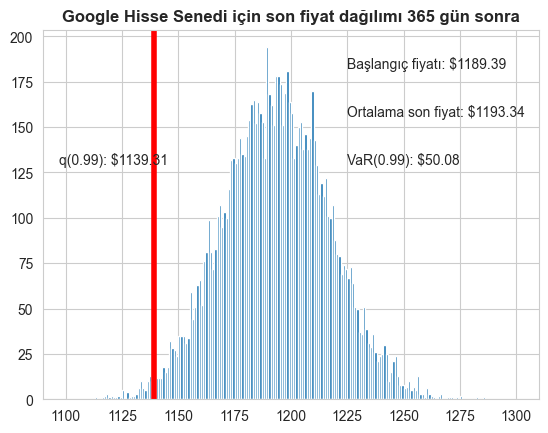

In [33]:
runs = 10000

simulations = np.zeros(runs)

for run in range(1,runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200,range = [1100,1300])

plt.figtext(0.6,0.8,s="Başlangıç ​​fiyatı: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Ortalama son fiyat: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Google Hisse Senedi için son fiyat dağılımı %s gün sonra" %days, weight='bold')

Histograma dayanarak, Google'ın hisse senedi fiyatının oldukça istikrarlı olduğu sonucuna varıyoruz (başlangıç ​​ve ortalama nihai fiyat arasında yalnızca 0,11 ABD doları fark var). Yatırımımızın riske maruz değeri, %99 güvenle 1.142,97 $'lık maksimum düşük fiyat için 46,42 $'dır; bu, önyükleme yoluyla elde ettiğimiz %6,5'e kıyasla yaklaşık %3,9'luk bir risktir.